loading all library

In [1]:
library(dplyr)
library(tidyverse)
library(corrplot)
library(gridExtra)
library(GGally)
library(knitr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ readr   1.3.1     
✔ tibble  2.1.3          ✔ purrr   0.3.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ ggplot2 3.2.1.9000     ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.84 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa




In [2]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input/")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

[1] "credit-card"

loading data

In [3]:
dataset = read.csv( "../input/credit-card/credit-card-data.csv")

In [4]:
dataset

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
C10001,40.90075,0.818182,95.40,0.00,95.40,0.0000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.50979,0.000000,12
C10002,3202.46742,0.909091,0.00,0.00,0.00,6442.9455,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.34022,0.222222,12
C10003,2495.14886,1.000000,773.17,773.17,0.00,0.0000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.28479,0.000000,12
C10004,1666.67054,0.636364,1499.00,1499.00,0.00,205.7880,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,NA,0.000000,12
C10005,817.71434,1.000000,16.00,16.00,0.00,0.0000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.79124,0.000000,12
C10006,1809.82875,1.000000,1333.28,0.00,1333.28,0.0000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.24604,0.000000,12
C10007,627.26081,1.000000,7091.01,6402.63,688.38,0.0000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.3143,198.06589,1.000000,12
C10008,1823.65274,1.000000,436.20,0.00,436.20,0.0000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.0651,532.03399,0.000000,12
C10009,1014.92647,1.000000,861.49,661.49,200.00,0.0000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.2786,311.96341,0.000000,12


checking missing data

In [5]:
missing_column= colnames(dataset)[colSums(is.na(dataset)) > 0]

In [6]:
dataset$CREDIT_LIMIT[is.na(dataset$CREDIT_LIMIT)] <- median(dataset$CREDIT_LIMIT, na.rm = T) 
dataset$MINIMUM_PAYMENTS[is.na(dataset$MINIMUM_PAYMENTS)] <- median(dataset$MINIMUM_PAYMENTS, na.rm = T) 

In [7]:
dataset=within(dataset, rm(CUST_ID))

In [8]:
datset_original=data.frame(dataset)

visualising data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



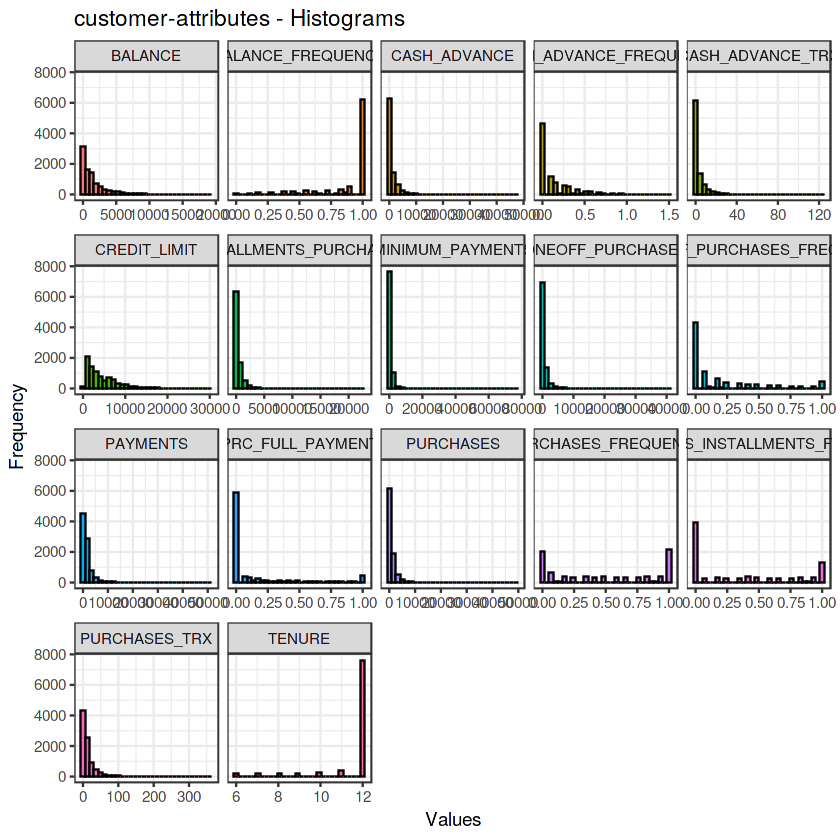

In [9]:
dataset %>%
  gather(Attributes, value, 1:17) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_histogram(colour="black", show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Frequency",
       title="customer-attributes - Histograms") +
  theme_bw()

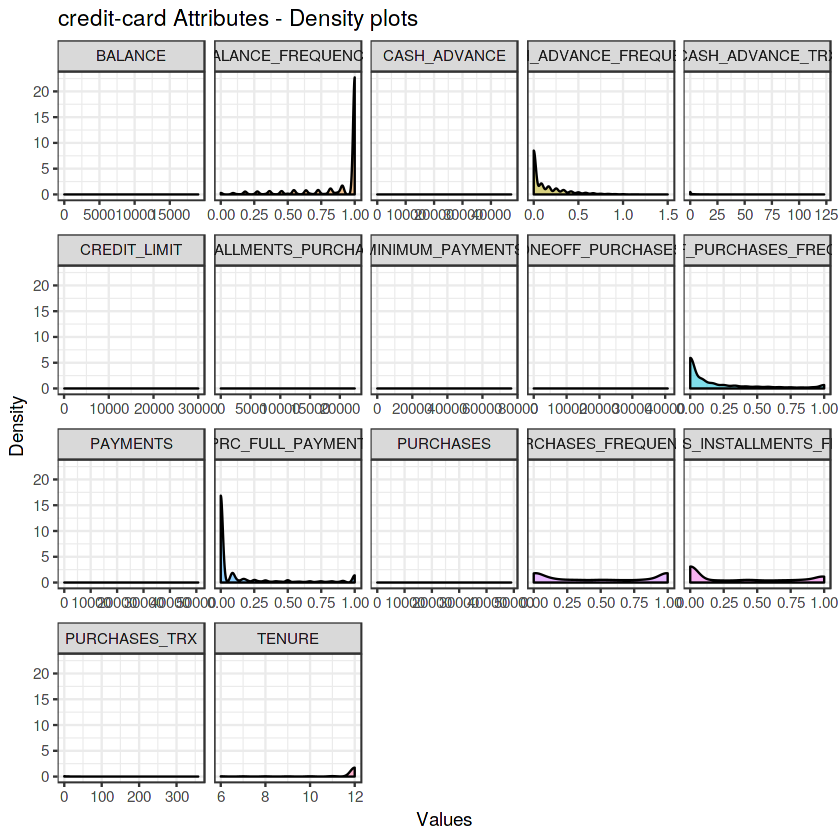

In [10]:
dataset %>%
  gather(Attributes, value, 1:17) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_density(colour="black", alpha=0.5, show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Density",
       title="credit-card Attributes - Density plots") +
  theme_bw()

doing log transform to scale outliers

In [11]:
cols = list("BALANCE",
        "PURCHASES",
        "ONEOFF_PURCHASES",
        "INSTALLMENTS_PURCHASES",
        "CASH_ADVANCE",
        "CASH_ADVANCE_TRX",
        "PURCHASES_TRX",
        "CREDIT_LIMIT",
        "PAYMENTS",
        "MINIMUM_PAYMENTS")
for (i in cols){
  dataset[i]=log(1+dataset[i])}

In [12]:
dataset=scale(dataset)

doing principal component analysis and finding optimal number of components

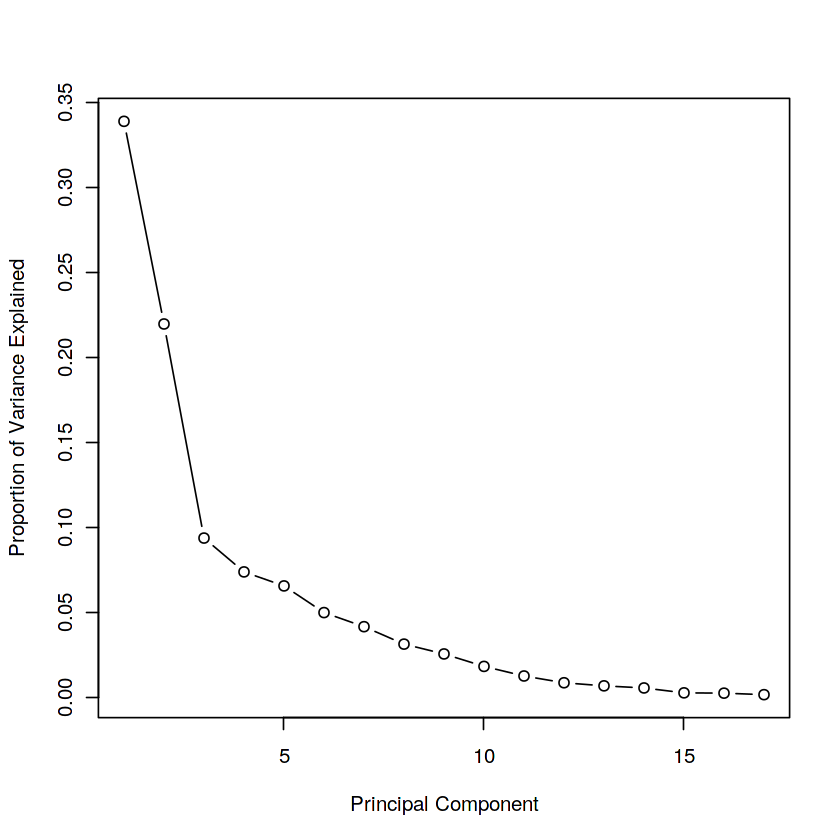

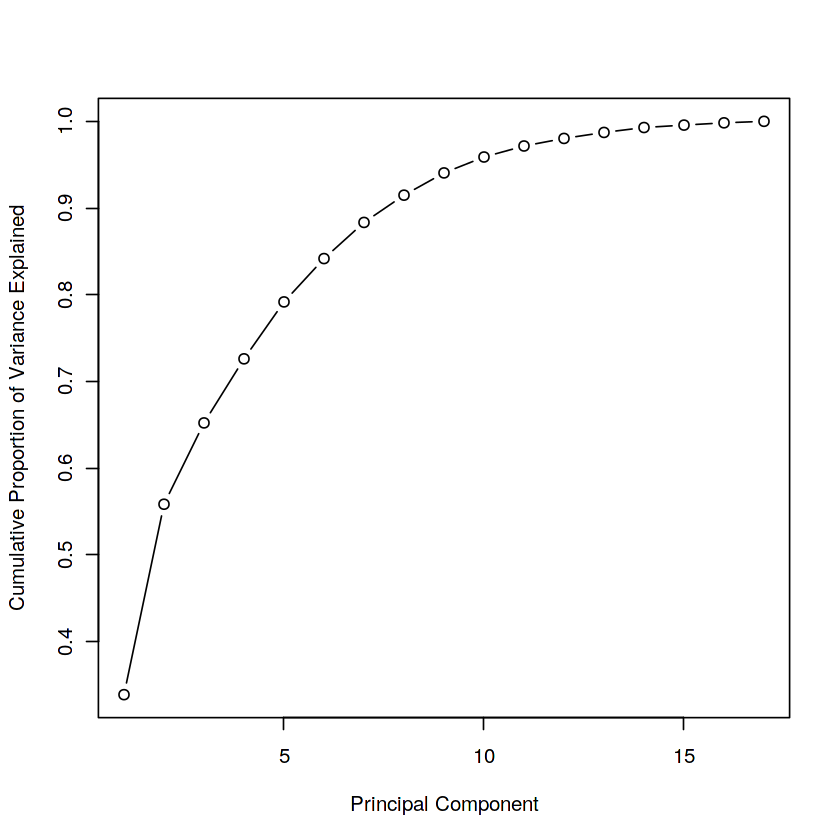

In [13]:
prin_comp <- prcomp(dataset, scale. = T)
std_dev <- prin_comp$sdev
pr_var <- std_dev^2
prop_varex <- pr_var/sum(pr_var)
plot(prop_varex, xlab = "Principal Component",
     ylab = "Proportion of Variance Explained",
     type = "b")
plot(cumsum(prop_varex), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     type = "b")



In [14]:
prin_comp <- prcomp(dataset, scale. = T,rank.=10)

In [15]:
prin_comp$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0.3087190,2.677635538,0.30344352,1.0388731,-0.32478366,0.07901944,-0.70752142,-0.27690899,-0.23429369,-0.32668108
3.4240841,-1.058510520,-0.02938053,0.2418902,1.67275547,0.43502865,0.69596329,-0.10417405,0.15901199,0.50727106
-1.5473568,-1.317290705,-2.73184565,0.8772382,-0.85910365,0.19986132,0.38970612,0.90521838,-0.14218022,1.23295261
1.2767148,1.167885951,-1.80014517,0.4667970,-1.59476334,-2.32997554,0.38785159,2.43962184,0.79665514,-1.57936843
1.1704186,1.326783280,-0.83220371,1.6966865,-0.41152811,1.17627118,-0.33082871,-0.38920108,-0.29505949,-0.22113510
-1.1128631,-0.387991012,1.60572641,2.0019262,-0.25773994,0.12748962,0.45114318,-0.85424163,0.83443019,-0.13570169
-4.7901861,-1.644686348,-1.41866030,-1.3584792,1.62699410,1.16163377,0.51482911,0.84013331,0.23307598,0.45664373
-1.7058155,0.008658616,1.99872585,1.5139134,-0.30249953,-0.01613535,0.28666836,-0.17747840,-0.24987609,0.23943900
-0.9219808,-0.116603850,-0.83062441,1.1910346,0.01432968,-0.32510029,0.77047779,-0.07208799,-0.59253032,-1.22258854
-0.2608500,1.187601785,-2.65742236,0.1466602,0.70316398,-1.17722255,0.66105891,-0.68066271,-0.77533582,-0.86697300


In [16]:
library(factoextra)
library(NbClust)

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ



In [19]:
install.packages('ggsignif')
library(ggsignif)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



finding optimum number of cluster by elbow method

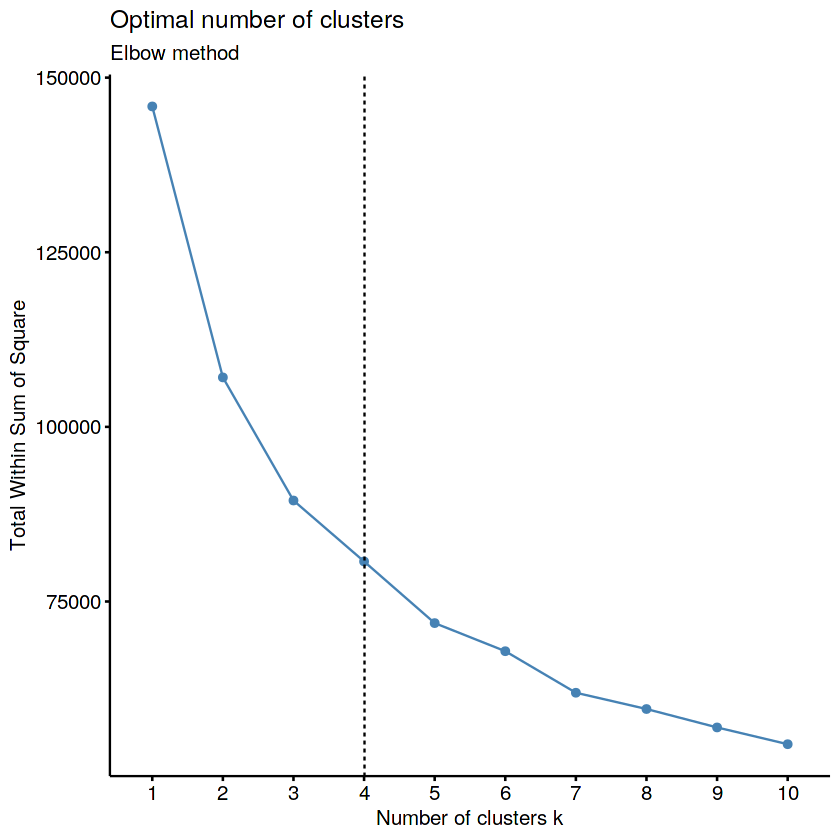

In [20]:
fviz_nbclust(prin_comp$x, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")

In [21]:
km2 <- kmeans(prin_comp$x, centers = 4 ,nstart = 30)

doing cluster analysis  by kmean++

In [22]:
library(LICORS)
k <- kmeanspp(prin_comp$x, k = 4, start = "random", iter.max = 100, nstart = 1)

In [24]:
mydata <- data.frame(datset_original, k$cluster)

In [31]:
sum(mydata$k.cluster==0)/nrow(mydata)

[1] 0

In [26]:
mydata

BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,k.cluster
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
40.90075,0.818182,95.40,0.00,95.40,0.0000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.8021,139.50979,0.000000,12,3
3202.46742,0.909091,0.00,0.00,0.00,6442.9455,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.0326,1072.34022,0.222222,12,1
2495.14886,1.000000,773.17,773.17,0.00,0.0000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.0667,627.28479,0.000000,12,2
1666.67054,0.636364,1499.00,1499.00,0.00,205.7880,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.0000,312.34395,0.000000,12,3
817.71434,1.000000,16.00,16.00,0.00,0.0000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.3348,244.79124,0.000000,12,3
1809.82875,1.000000,1333.28,0.00,1333.28,0.0000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.0578,2407.24604,0.000000,12,2
627.26081,1.000000,7091.01,6402.63,688.38,0.0000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.3143,198.06589,1.000000,12,2
1823.65274,1.000000,436.20,0.00,436.20,0.0000,1.000000,0.000000,1.000000,0.000000,0,12,2300,679.0651,532.03399,0.000000,12,2
1014.92647,1.000000,861.49,661.49,200.00,0.0000,0.333333,0.083333,0.250000,0.000000,0,5,7000,688.2786,311.96341,0.000000,12,2
